<a href="https://colab.research.google.com/github/VS-Lucas/Clustering/blob/main/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap

Função para plotar o gráfico

In [2]:
def generate_plot(features, labels, centers, km):
  fig, ax = plt.subplots()

  ax.scatter(features[3], features[4], c=km.labels_, cmap="winter")
  ax.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100)

  centers = km.cluster_centers_

  plt.show()

Dataframe dos dados transformado em um array NumPy

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv')
df = dataset.values
df

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]])

Normalização do dataset e conversão para um dataframe

In [ ]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df)
dataset = pd.DataFrame(norm)

Escolher o range de colunas

In [ ]:
leftSlice, rightSlice = map(int, input().split())

3 5


Elbow method para achar o k ótimo

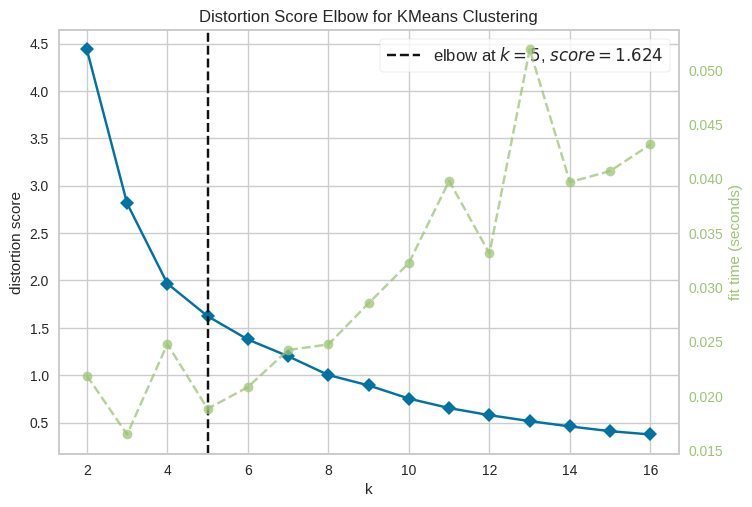

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
features = dataset.iloc[:, leftSlice:rightSlice]

model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,17))

visualizer.fit(features)    
visualizer.poof()   

Testando diferentes números de clusters e encontrando o k ótimo a partir do silhouette coefficient

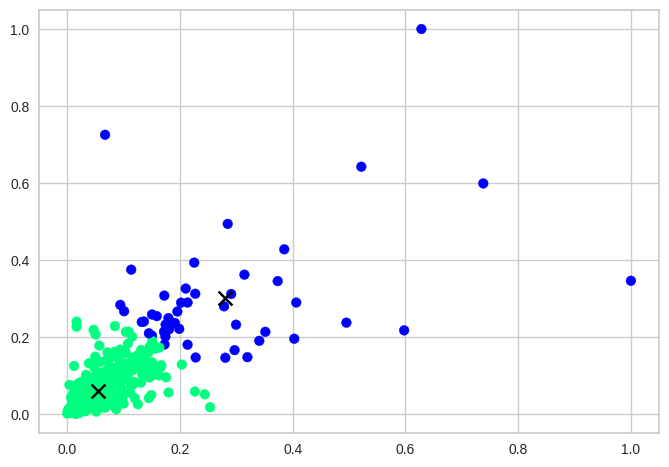


<< SILHOUETTE PARA K=2: 0.7056659517901923 >>

***************************************************************************************


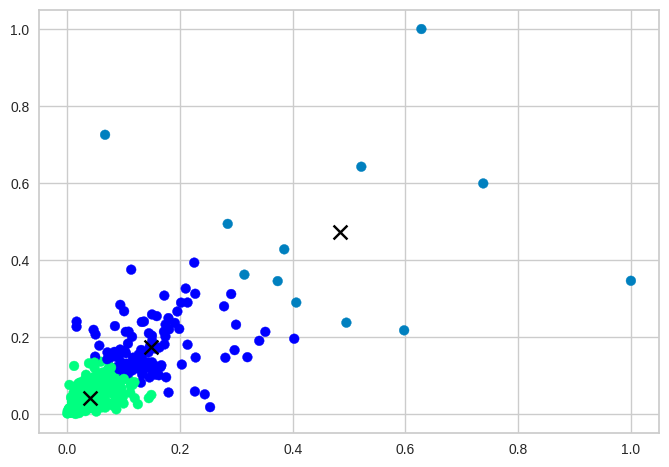


<< SILHOUETTE PARA K=3: 0.5899645156991108 >>

***************************************************************************************


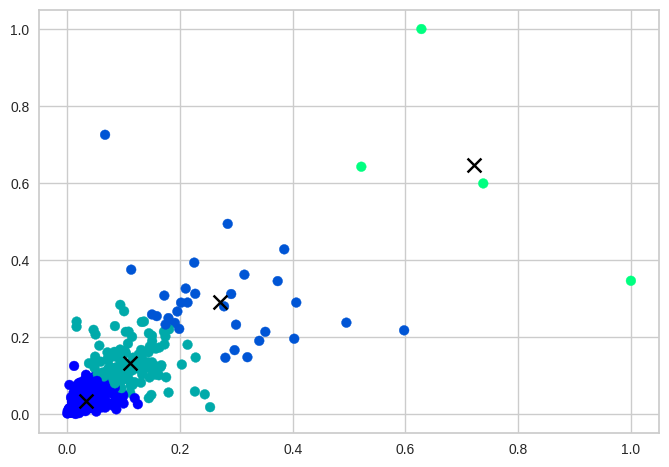


<< SILHOUETTE PARA K=4: 0.5524516401799058 >>

***************************************************************************************


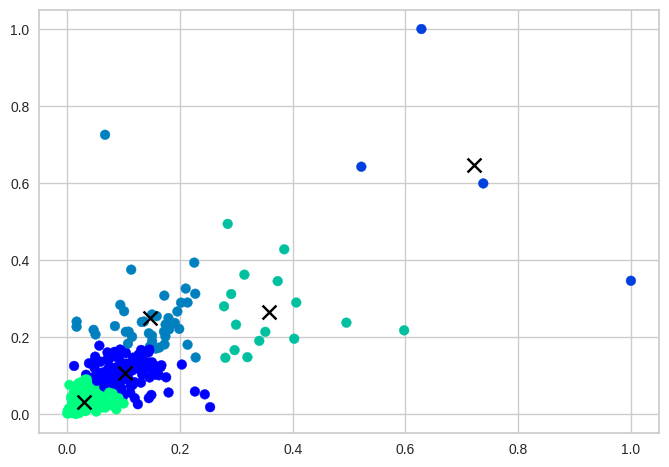


<< SILHOUETTE PARA K=5: 0.5262964136657393 >>

***************************************************************************************


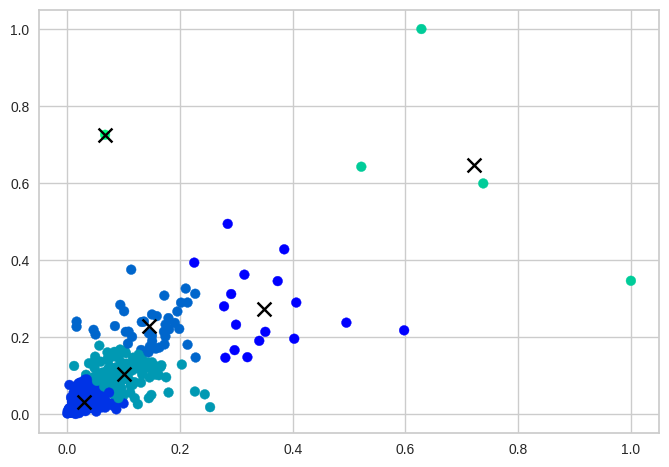


<< SILHOUETTE PARA K=6: 0.522939798855563 >>

***************************************************************************************


In [ ]:
for clusters in range(2, 7):

  kmeans = KMeans(n_clusters=clusters, n_init=10)
  kmeans.fit(features)
  cluster_labels = kmeans.predict(features)

  silhouette_avg = metrics.silhouette_score(features, cluster_labels)
  centers = kmeans.cluster_centers_

  generate_plot(features, cluster_labels, centers, kmeans)

  print(f'\n<< SILHOUETTE PARA K={clusters}: {metrics.silhouette_score(features, cluster_labels)} >>\n')
  print('*'*87)
